In [1]:
import os
import os.path as path
import sys

EXAMPLE_DIR = path.abspath("")
GIT_DIR = path.split(EXAMPLE_DIR)[0]
SRC_DIR = path.join(GIT_DIR, "src")
sys.path.append(SRC_DIR)

In [2]:
import fpcore
import lambdas

import matplotlib.pyplot as plt

from interval import Interval
from lambdas import *
from plot_lambda import plot_lambda
from compare_plot_lambda import compare_plot_lambda

In [3]:
from fpcore.interface import *
x = var("x")
dom = Interval("(- (/ PI 4))", "(/ PI 4)")
samples = 2**17
func = fpcore.parse("(FPCore (x) (/ 1 (cos x)))")

In [4]:
poly = Polynomial({0: "1",
                   2: "0.5",
                   4: "0.20833333333333334",
                   6: "0.08472222222222223",
                   8: "0.034350198412698416"},
                  scheme="horner",
                  split=1)
poly


Horner(FixedPolynomial(FPCore(None, [Variable(x)], [], Operation('+', Operation('+', Operation('+', Operation('+', Operation('*', Number(1), Number(1)), Operation('*', Number(0.5), Operation('*', Variable(x), Variable(x)))), Operation('*', Number(0.20833333333333334), Operation('*', Operation('*', Variable(x), Variable(x)), Operation('*', Variable(x), Variable(x))))), Operation('*', Number(0.08472222222222223), Operation('*', Operation('*', Operation('*', Variable(x), Variable(x)), Variable(x)), Operation('*', Operation('*', Variable(x), Variable(x)), Variable(x))))), Operation('*', Number(0.034350198412698416), Operation('*', Operation('*', Operation('*', Variable(x), Variable(x)), Operation('*', Variable(x), Variable(x))), Operation('*', Operation('*', Variable(x), Variable(x)), Operation('*', Variable(x), Variable(x))))))), Interval("(- INFINITY)", "INFINITY"), [0, 2, 4, 6, 8], ['1', '0.5', '0.20833333333333334', '0.08472222222222223', '0.034350198412698416'], ))

In [5]:
try:
    appr = Approx(func, dom, 0.00165, poly)
    appr.type_check()
except ApproxError as e:
    print(e)

Outer func: (FPCore (x)  (/ 1 (cos x)))
Inner func: (FPCore (x)  (+ (+ (+ (+ (* 1 1) (* 0.5 (* x x))) (* 0.20833333333333334 (* (* x x) (* x x)))) (* 0.08472222222222223 (* (* (* x x) x) (* (* x x) x)))) (* 0.034350198412698416 (* (* (* x x) (* x x)) (* (* x x) (* x x))))))
Domain: [-0.7853981633974483, 0.7853981633974483]Epsilon: 0.00165
InfNorm: 0.0016578567961050507


In [6]:
appr = Approx(func, dom, 0.00166, poly)
#plot_lambda(dom, appr, "Taylor Secant", samples)

In [7]:
my_poly = Polynomial({1:"0x1p0",
                      3:"-0x1.5555555555555p-3",
                      5:"0x1.11111111110cep-7",
                      7:"-0x1.a01a01a014cdcp-13",
                      9:"0x1.71de3a51f7d72p-19",
                      11:"-0x1.ae6453b8ffe4p-26",
                      13:"0x1.6122f3bdb02f2p-33",
                      15:"-0x1.ad88872bfdbfp-41",
                      17:"0x1.286649f6f2e04p-49",
                      19:"0x1.cfd6b0ea53f49p-53",
                      21:"-0x1.31d0ab94fbe9cp-55",
                      23:"0x1.51f06890096e5p-59"},
                      split=1)
my_sin = Approx(make_function([x], sin(x)),
                Interval(-PI / 2, PI / 2),
                2e-16,
                my_poly)
my_cos = Approx(make_function([x], cos(x)),
                Interval(-PI / 2, PI / 2),
                1.4142135623730951,
                my_sin)

#plot_lambda(Interval(-PI / 2, PI / 2), my_cos, "IEEE Cos", samples)
#plot_lambda(Interval(-PI / 2, PI / 2), my_sin, "IEEE Sin", samples)


2023-07-03 22:01:50.464441 add_expr: type_check: In function: (FPCore (s)  (- (- (log (+ 1 s)) (log (- 1 s))) (* 2 s)))
2023-07-03 22:01:50.726566 add_expr: type_check: Out function: (FPCore  (s)  (log (/ (+ s 1) (- 1 s))))


2023-07-03 22:01:53.464349 dirtyinfnorm: WARNING: Sollya printed to stderr


<Axes: title={'center': 'Absolute error for New'}, xlabel='Input', ylabel='Error'>

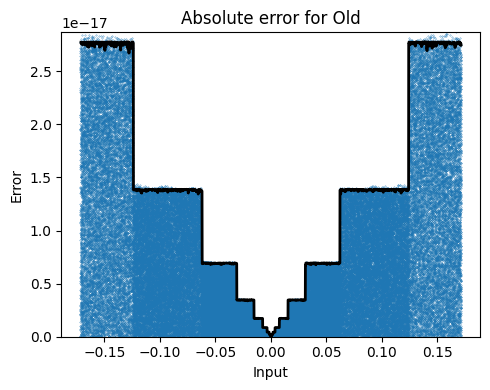

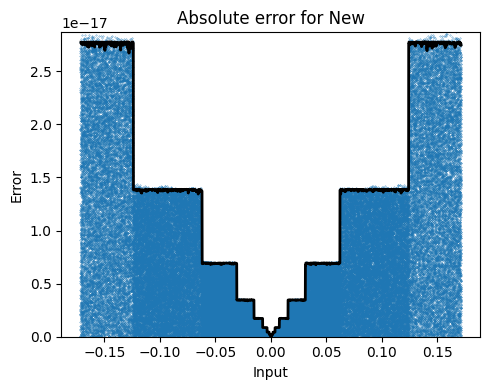

In [15]:
s_log_sub_two_s = fpcore.parse(
    "(FPCore (s) (- (- (log (+ 1 s)) (log (- 1 s))) (* 2 s)))")
s_domain = Interval(
    fpcore.parse_expr("(/ (- (/ (sqrt 2) 2) 1) (+ 2 (- (/ (sqrt 2) 2) 1)))"),
    fpcore.parse_expr("(/ (- (sqrt 2) 1) (+ 2 (- (sqrt 2) 1)))"))
old = \
    AddExpr(fpcore.parse_expr("(* 2 s)"),
        Horner(
        FixedMultiPolynomial(
            s_log_sub_two_s,
            s_domain,
            fpcore.parse(
                "(FPCore (x p q) (* x (+ p q)))"),
            [4, 8, 12],
            ["3.999999999940941908e-01",
             "2.222219843214978396e-01",
             "1.531383769920937332e-01",],
            [2, 6, 10, 14],
            ["6.666666666666735130e-01",
             "2.857142874366239149e-01",
             "1.818357216161805012e-01",
             "1.479819860511658591e-01"])))

s = var("s")
new = \
    Approx(make_function([s], log(1+s) - log(1-s)),
           s_domain,
           0.9,
    Add(Polynomial({1: "2"}),
        Mul(Polynomial({1: "1"}),
            Add(Polynomial({4: "3.999999999940941908e-01",
                            8: "2.222219843214978396e-01",
                            12: "1.531383769920937332e-01", }),
                Polynomial({2: "6.666666666666735130e-01",
                            6: "2.857142874366239149e-01",
                            10: "1.818357216161805012e-01",
                            14: "1.479819860511658591e-01"})))))

plot_lambda(s_domain, old, "Old", samples)
plot_lambda(s_domain, new, "New", samples)
